Mean: 537676.85
Variance: 76412906745.62

Frequency Distribution:
50005.0 - 123055.08: 145
123055.08 - 196105.15: 152
196105.15 - 269155.23: 140
269155.23 - 342205.31: 158
342205.31 - 415255.38: 138
415255.38 - 488305.46: 137
488305.46 - 561355.54: 177
561355.54 - 634405.62: 130
634405.62 - 707455.69: 173
707455.69 - 780505.77: 150
780505.77 - 853555.85: 167
853555.85 - 926605.92: 162
926605.92 - 999656.0: 183


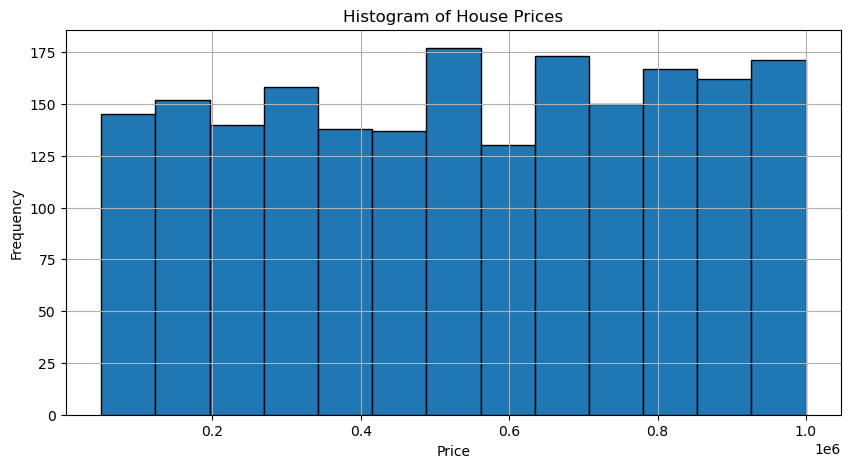

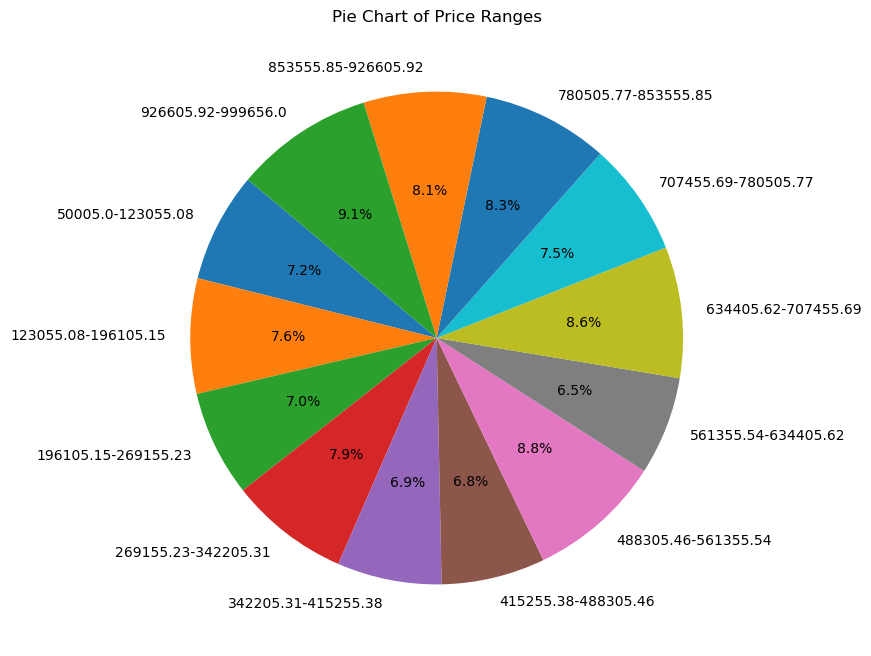


Mean from Frequency Distribution: 540261.06
Variance from Frequency Distribution: 76325011849.97

95% Confidence Interval: (522670.44, 549696.96)
95% Tolerance Interval: (-15377.92, 1087745.32)
Test Data within Tolerance Interval: 100.00%

T-Statistic: 6.0955
One-tailed P-Value: 0.0000
Result: Reject H0 – Average house price is significantly greater than 500,000


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

# Load dataset
# This dataset should have a column named 'price' representing house prices.
df = pd.read_csv("House Price Prediction DataSet.csv")  # Dataset with ~2000 rows

# Focus on the 'price' column for analysis
data = df['Price'].values

# --- 1. Mean and Variance (Manual Calculation) ---
def calculate_mean(data):
    return sum(data) / len(data)

def calculate_variance(data):
    mean = calculate_mean(data)
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)

mean = calculate_mean(data)
variance = calculate_variance(data)

print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")

# --- 2. Frequency Distribution ---
bins = np.histogram_bin_edges(data, bins='auto')
hist = [0] * (len(bins) - 1)
for value in data:
    for i in range(len(bins) - 1):
        if bins[i] <= value < bins[i + 1]:
            hist[i] += 1
            break
        elif value == bins[-1]:
            hist[-1] += 1

freq_distribution = {
    f"{round(bins[i],2)} - {round(bins[i+1],2)}": hist[i] for i in range(len(hist))
}

print("\nFrequency Distribution:")
for k, v in freq_distribution.items():
    print(f"{k}: {v}")

# --- 3. Histogram ---
plt.figure(figsize=(10, 5))
plt.hist(data, bins=bins, edgecolor='black')
plt.title("Histogram of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
labels = [f"{round(bins[i],2)}-{round(bins[i+1],2)}" for i in range(len(bins) - 1)]
plt.pie(hist, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Price Ranges")
plt.show()

# --- 4. Stats from Frequency Distribution ---
mid_points = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
total_freq = sum(hist)
freq_mean = sum(mid_points[i] * hist[i] for i in range(len(hist))) / total_freq
freq_variance = sum(((mid_points[i] - freq_mean) ** 2) * hist[i] for i in range(len(hist))) / (total_freq - 1)

print(f"\nMean from Frequency Distribution: {freq_mean:.2f}")
print(f"Variance from Frequency Distribution: {freq_variance:.2f}")

# --- 5. Confidence and Tolerance Intervals ---
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
n = len(train_data)
mean_train = calculate_mean(train_data)
std_train = (sum((x - mean_train) ** 2 for x in train_data) / (n - 1)) ** 0.5

t_critical = 1.960  # Approximate t-score for 95% CI with large n
margin_error = t_critical * (std_train / (n ** 0.5))
ci_low = mean_train - margin_error
ci_high = mean_train + margin_error

print(f"\n95% Confidence Interval: ({ci_low:.2f}, {ci_high:.2f})")

# Tolerance Interval (using k ≈ 2)
k = 2.0
ti_low = mean_train - k * std_train
ti_high = mean_train + k * std_train
print(f"95% Tolerance Interval: ({ti_low:.2f}, {ti_high:.2f})")

# Validation with test data
within_ti = sum(1 for x in test_data if ti_low <= x <= ti_high)
percent_within = within_ti / len(test_data) * 100
print(f"Test Data within Tolerance Interval: {percent_within:.2f}%")

# --- 6. Hypothesis Testing (Manual Calculation) ---
# H0: mean <= 500000, H1: mean > 500000
hyp_mean = 500000
sample_mean = calculate_mean(data)
sample_std = (sum((x - sample_mean) ** 2 for x in data) / (len(data) - 1)) ** 0.5
n_total = len(data)
t_stat = (sample_mean - hyp_mean) / (sample_std / (n_total ** 0.5))
p_value = 1 - stats.t.cdf(t_stat, df=n_total - 1)

print(f"\nT-Statistic: {t_stat:.4f}")
print(f"One-tailed P-Value: {p_value:.4f}")

if (p_value < 0.05) and (t_stat > 0):
    print("Result: Reject H0 – Average house price is significantly greater than 500,000")
else:
    print("Result: Fail to reject H0 – Insufficient evidence that average price > 500,000")